In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import recursive

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Toy Example 1

In [7]:
'''
0


2
| \
|   \
3    1
|\  / \
| \/   \
4--5----6
'''
edges1 = [
    [1,2],
    [2,3],
    [3,4],
    [4,5],
    [3,5],
    [1,5],
    [5,6],
    [1,6]
]

n = 7
edges = pd.DataFrame(edges1, columns=['f', 't'])
query = 'triangle'
eps1 = 1
eps2 = 1
theta = 1
beta = eps1/5
mu = 1
recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu, logging=True)

'local sensitivity is 2'

100%|██████████| 8/8 [00:00<00:00, 192.35it/s]


'delta is 1.2214027581601699'

'X is 1.145278850541975'

{'noisy': 0.7603874648907467, 'truth': 2}

/home/yuchao/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'absolute error; truth = 2')

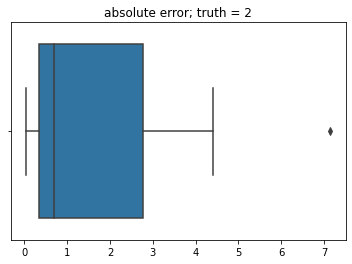

In [13]:
reses = [recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu) for i in range(10)]
fig, ax = plt.subplots()
sns.boxplot([abs(res['noisy'] - res['truth']) for res in reses])
ax.set_title(f'absolute error; truth = {reses[0]["truth"]}')

# Toy Example 2

In [15]:
'''
0


2
| \
|   \
3----1
|\  / \
| \/   \
4--5----6
'''
edges2 = [
    [1,2],
    [2,3],
    [3,4],
    [4,5],
    [3,5],
    [1,5],
    [5,6],
    [1,6],
    [1,3]
]

n = 7
edges = pd.DataFrame(edges2, columns=['f', 't'])
query = 'triangle'
eps1 = 1
eps2 = 1
theta = 1
beta = eps1/5
mu = 0
recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu, logging=True)

'local sensitivity is 3'

100%|██████████| 8/8 [00:00<00:00, 145.99it/s]


'delta is 1.4918246976412703'

'X is 2.578866837037557'

{'noisy': 2.7444574514988878, 'truth': 4}

/home/yuchao/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'absolute error; truth = 4')

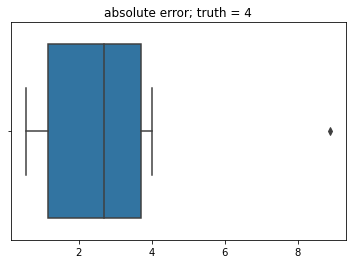

In [16]:
reses = [recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu) for i in range(10)]
fig, ax = plt.subplots()
sns.boxplot([abs(res['noisy'] - res['truth']) for res in reses])
ax.set_title(f'absolute error; truth = {reses[0]["truth"]}')

# P-random graph

In [18]:
# Generate p-random graph
n = 50
p = 0.2
p_random_edges = []
for i in range(n):
    for j in range(i+1, n):
        if np.random.uniform() < p:
            p_random_edges.append([i, j])

In [22]:
n = n
edges = pd.DataFrame(p_random_edges, columns=['f', 't'])
query = 'triangle'
eps1 = 1
eps2 = 1
theta = 1
beta = eps1/5
mu = 1
recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu, logging=True)

'local sensitivity is 16'

100%|██████████| 51/51 [00:01<00:00, 36.46it/s]


'delta is 4.953032424395115'

'X is 79.05791252451482'

{'noisy': 83.73908997831182, 'truth': 102}

/home/yuchao/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'absolute error; truth = 102')

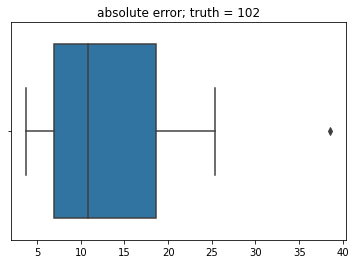

In [23]:
reses = [recursive.recursive(n, edges, query, eps1, eps2, theta, beta, mu) for i in range(10)]
fig, ax = plt.subplots()
sns.boxplot([abs(res['noisy'] - res['truth']) for res in reses])
ax.set_title(f'absolute error; truth = {reses[0]["truth"]}')